In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train =pd.read_csv("train.csv")
test =pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.shape

(418, 11)

In [9]:
train.shape

(891, 12)

In [10]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Percentage of women survived 74.20382165605095
Percentage of men survived 18.890814558058924


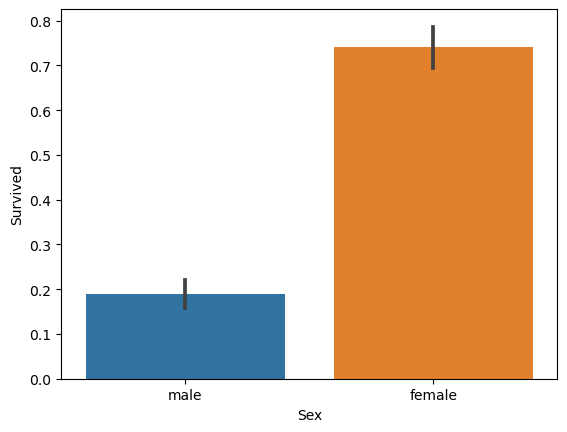

In [18]:
sns.barplot(x='Sex',y='Survived',data=train)
print('Percentage of women survived',train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1]*100)
print('Percentage of men survived',train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100)

Percentage of women survived 62.96296296296296
Percentage of women survived 47.28260869565217
Percentage of women survived 24.236252545824847


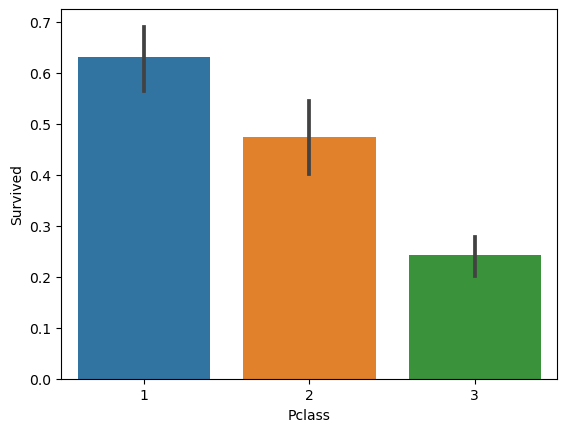

In [21]:
sns.barplot(x='Pclass',y='Survived',data=train)
print('Percentage of women survived',train['Survived'][train['Pclass']==1].value_counts(normalize=True)[1]*100)
print('Percentage of women survived',train['Survived'][train['Pclass']==2].value_counts(normalize=True)[1]*100)
print('Percentage of women survived',train['Survived'][train['Pclass']==3].value_counts(normalize=True)[1]*100)

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


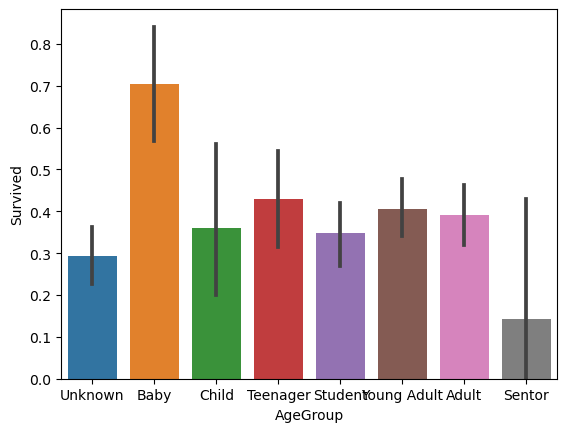

In [23]:
train.Age=train.Age.fillna(-0.5)
test.Age=test.Age.fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 69, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Sentor']
train['AgeGroup'] = pd.cut(train['Age'],bins, labels = labels)
sns.barplot(x='AgeGroup',y='Survived',data=train)
plt.show()

In [24]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [26]:
train=train.drop(['Ticket','Cabin','Fare'],axis=1)
test=test.drop(['Ticket','Cabin','Fare'],axis=1)

KeyError: "['Ticket', 'Cabin', 'Fare'] not found in axis"

In [30]:
print('Number of people enbarking in Southampton (S) : ')
southampton = train[train['Embarked'] == 'S'].shape[0]
print (southampton)

print('Nurber of people enbarking in Cherbourg (C):' )
cher = train[train ['Embarked'] == 'C'].shape[0]
print (cher)

print('Number of people enbarking in Queenstomn (Q) : ')
queen = train[train['Embarked'] == 'Q' ].shape[0]
print (queen)

Number of people enbarking in Southampton (S) : 
644
Nurber of people enbarking in Cherbourg (C):
168
Number of people enbarking in Queenstomn (Q) : 
77
